# Figure 1: Panels comparing HR and filtered simulation and SGS fluxes

In [1]:
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
import xgcm
import gcsfs
import os

In [2]:
## MOM6 data

PERSISTENT_BUCKET = os.environ['PERSISTENT_BUCKET']

ds_P2L = xr.open_zarr(f'{PERSISTENT_BUCKET}/MOM6/Phillips2Layer/res4km_sponge10day_long.zarr')
ds_DG = xr.open_zarr(f'{PERSISTENT_BUCKET}/MOM6/Double_Gyre/res5km/prog.zarr')

Lfilt= '100'

ds_P2L_filt = xr.open_zarr(f'{PERSISTENT_BUCKET}/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_'+Lfilt+'km_8_Aug_24.zarr')
ds_DG_filt = xr.open_zarr(f'{PERSISTENT_BUCKET}/MOM6/Double_Gyre/res5km/ml_data_'+Lfilt+'km_8_Aug_24.zarr')

In [3]:
f = 1e-4

Figure saved as figure1.pdf


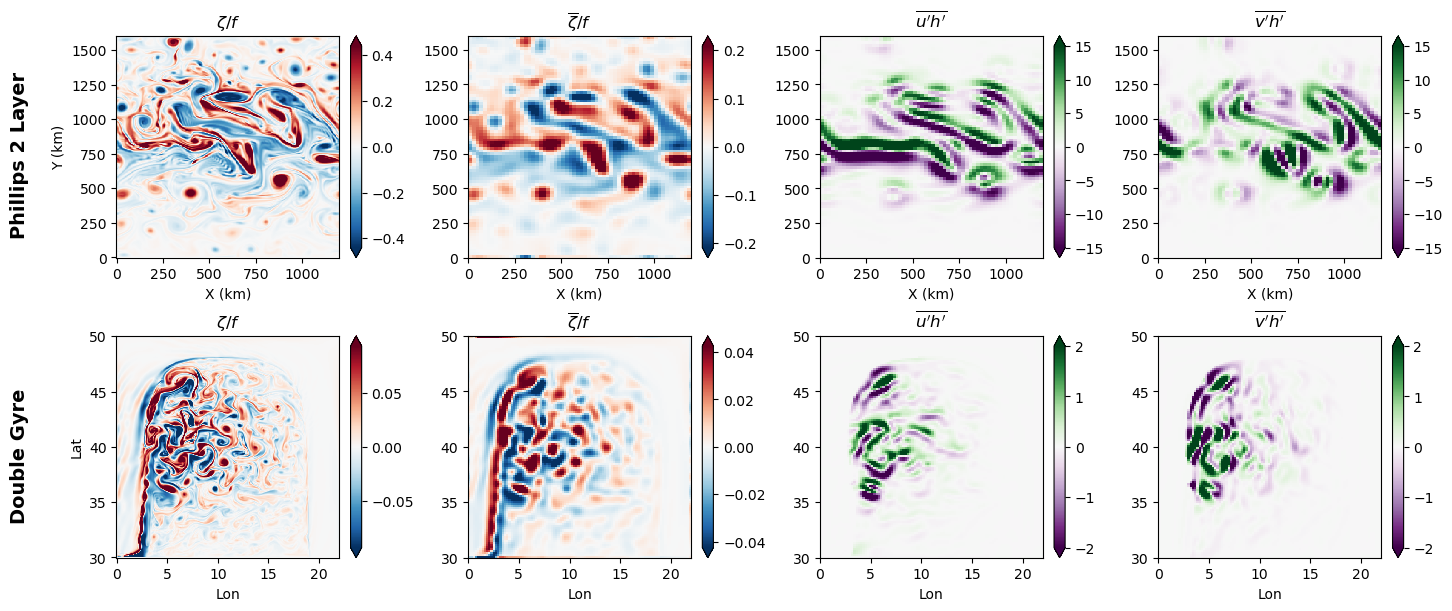

In [4]:
# Define colormaps
vorticity_cmap = "RdBu_r"  # Colormap for vorticities
eddy_cmap = "PRGn"         # Colormap for eddy terms

# Define color limits for eddy terms
top_row_eddy_limits = {"vmin": -15, "vmax": 15}  # Adjust these values as needed for the top row
bottom_row_eddy_limits = {"vmin": -2, "vmax": 2}  # Adjust these values as needed for the bottom row

fig, axes = plt.subplots(2, 4, figsize=(14, 6), constrained_layout=True)

# Add rotated titles for experiments
fig.text(-0.02, 0.75, 'Phillips 2 Layer', va='center', ha='center', rotation='vertical', fontsize=14, fontweight='bold')
fig.text(-0.02, 0.25, 'Double Gyre', va='center', ha='center', rotation='vertical', fontsize=14, fontweight='bold')

# Titles for each column
column_titles = [r'$\zeta/f$', r'$\overline{\zeta}/f$', r"$\overline{u'h'}$", r"$\overline{v'h'}$"]

# Phillips 2 Layer plots
(ds_P2L.RV / f).isel(Time=-1, zl=0).plot(ax=axes[0, 0], robust=True, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=vorticity_cmap)
axes[0, 0].set_xlabel('X (km)')
axes[0, 0].set_ylabel('Y (km)')
axes[0, 0].set_title(column_titles[0], fontsize=12, fontweight='bold')

((ds_P2L_filt.dvdx - ds_P2L_filt.dudy) / f).isel(Time=-1, zl=0).plot(ax=axes[0, 1], robust=True, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=vorticity_cmap)
axes[0, 1].set_xlabel('X (km)')
axes[0, 1].set_ylabel('')
axes[0, 1].set_title(column_titles[1], fontsize=12, fontweight='bold')

ds_P2L_filt.uphp.isel(Time=-1, zl=0).plot(ax=axes[0, 2], robust=False, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=eddy_cmap, **top_row_eddy_limits)
axes[0, 2].set_xlabel('X (km)')
axes[0, 2].set_ylabel('')
axes[0, 2].set_title(column_titles[2], fontsize=12, fontweight='bold')

ds_P2L_filt.vphp.isel(Time=-1, zl=0).plot(ax=axes[0, 3], robust=False, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=eddy_cmap, **top_row_eddy_limits)
axes[0, 3].set_xlabel('X (km)')
axes[0, 3].set_ylabel('')
axes[0, 3].set_title(column_titles[3], fontsize=12, fontweight='bold')

# Double Gyre plots
(ds_DG.RV / f).isel(Time=-1, zl=0).plot(ax=axes[1, 0], robust=True, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=vorticity_cmap)
axes[1, 0].set_xlabel('Lon')
axes[1, 0].set_ylabel('Lat')
axes[1, 0].set_title(column_titles[0], fontsize=12, fontweight='bold')

((ds_DG_filt.dvdx - ds_DG_filt.dudy) / f).isel(Time=-1, zl=0).plot(ax=axes[1, 1], robust=True, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=vorticity_cmap)
axes[1, 1].set_xlabel('Lon')
axes[1, 1].set_ylabel('')
axes[1, 1].set_title(column_titles[1], fontsize=12, fontweight='bold')

ds_DG_filt.uphp.isel(Time=-1, zl=0).plot(ax=axes[1, 2], robust=False, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=eddy_cmap, **bottom_row_eddy_limits)
axes[1, 2].set_xlabel('Lon')
axes[1, 2].set_ylabel('')
axes[1, 2].set_title(column_titles[2], fontsize=12, fontweight='bold')

ds_DG_filt.vphp.isel(Time=-1, zl=0).plot(ax=axes[1, 3], robust=False, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=eddy_cmap, **bottom_row_eddy_limits)
axes[1, 3].set_xlabel('Lon')
axes[1, 3].set_ylabel('')
axes[1, 3].set_title(column_titles[3], fontsize=12, fontweight='bold')


# Save the figure
output_filename = "figure1.pdf"
#fig.savefig(output_filename, format="pdf", dpi=300, bbox_inches="tight")
#fig.savefig("vorticity_and_eddy_terms.png", format="png", dpi=150, bbox_inches="tight")



### Scraps

In [ ]:
import xrft
filt_ps = xrft.power_spectrum( ds_P2L_filt.hbar, 'xh')
ps = xrft.power_spectrum(ds_P2L.h, 'xh')
filt_ps.isel(Time=slice(-10, None), zl=1).mean(['yh','Time']).plot(label='Filtered (100km) + coarsened (20km)' )
ps.isel(Time=slice(-10, None), zl=1).mean(['yh','Time']).plot(label='High res')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k [1/km]')
plt.ylabel(r'$\eta$ PS')
plt.title('Middle interface')